In [1]:
print("Hello world ")

Hello world 


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [20]:
!pwd


/mnt/c/Users/UTSEUS/dataanalysis


# Import of  Lille metropolis Data

In [17]:
mel_cities = gpd.read_file('2024-project/2024-project/cartographic-resources/mel_communes.zip')
dfe = gpd.read_parquet('2024-project/2024-project/cartographic-resources/mel.parquet')


In [13]:
print(type(mel_cities))
print(type(dfe))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

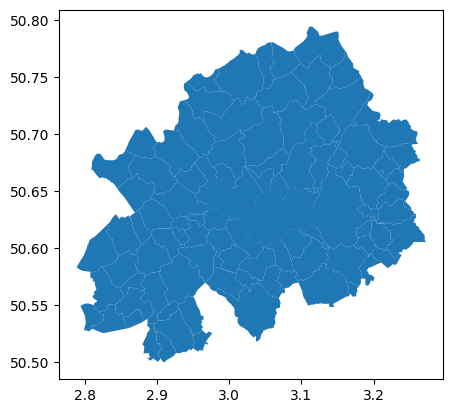

In [7]:
mel_cities.plot()


In [15]:
mel_cities.columns

Index(['insee', 'nom', 'ut', 'territoire', 'surface', 'perimetre',
       'code_posta', 'geometry'],
      dtype='object')

In [21]:
nordData = gpd.read_file('2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-202/IRIS_GE.SHX')
#IRIS-GE_2-0_SHP_LAMB93_D059-202/IRIS_GE.SHP

DriverError: 2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-202/IRIS_GE.SHX: No such file or directory